In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
kc = pd.read_csv('results_kc.csv').drop(columns=['Unnamed: 0'])
poa = pd.read_csv('results_poa.csv').drop(columns=['Unnamed: 0'])
sp = pd.read_csv('results_sp.csv').drop(columns=['Unnamed: 0'])
fc = pd.read_csv('results_fc.csv').drop(columns=['Unnamed: 0'])

metrics = ['MALE_test', 'RMSE_test', 'MAPE_test']#, 'MALE_train', 'RMSE_train', 'MAPE_train']
metrics = ['RMSE_test']

In [89]:
# get lowest sp['isMasked'] == False
sp[sp['isMasked'] == False]['RMSE_test'].min()

159700.3648690964

In [87]:
# get highest of sp with ismaked = True
sp[sp['isMasked'] == False]

,Dataset,iteration,isMasked,threshold,MALE_test,RMSE_test,MAPE_test,MALE_train,RMSE_train,MAPE_train
0,sp,1,False,0.1,0.139785,159949.953445,10.277003,0.135393,155593.708912,9.660553
9,sp,2,False,0.1,0.140542,160126.911776,10.334735,0.134332,154057.814331,9.660140
18,sp,3,False,0.1,0.140505,160372.547212,10.288572,0.133375,153167.972075,9.532606
27,sp,4,False,0.1,0.140318,159810.229717,10.301682,0.136177,155378.592468,9.849458
36,sp,5,False,0.1,0.140670,160819.996965,10.307374,0.134968,154964.706703,9.693587
45,sp,6,False,0.1,0.140317,160096.728588,10.289175,0.134301,154617.002744,9.631312
54,sp,7,False,0.1,0.139969,160039.286181,10.284667,0.134899,154527.529180,9.723705
63,sp,8,False,0.1,0.139542,160512.360553,10.263584,0.134810,155737.145314,9.672614
72,sp,9,False,0.1,0.139166,159700.364869,10.149522,0.131995,152776.257639,9.338293
81,sp,10,False,0.1,0.140753,161382.506341,10.457899,0.135215,155179.989795,9.735401


In [92]:
all_results = {}

def create_results(df):
    results = {}
    results['original'] = {}
    for threshold in df['threshold'].unique():
        results[str(threshold)] = {}

    original = df[df['isMasked'] == False]
    ours = df[df['isMasked'] == True]

    for metric in metrics:
        results['original'][metric] = (original[metric].mean(), original[metric].std())
        for threshold in df['threshold'].unique():
            results[str(threshold)][metric] = (ours[ours['threshold'] == threshold][metric].mean(), ours[ours['threshold'] == threshold][metric].std())

    return results
    
all_results['kc'] = create_results(kc)
all_results['poa'] = create_results(poa)
all_results['sp'] = create_results(sp)
all_results['fc'] = create_results(fc)

In [69]:
print(kc_results['original']['RMSE_test'][0] - min([kc_results[e]['RMSE_test'][0] for e in kc_results.keys() if e != 'original']))
print(fc_results['original']['RMSE_test'][0] - min([fc_results[e]['RMSE_test'][0] for e in fc_results.keys() if e != 'original']))
print(poa_results['original']['RMSE_test'][0] - min([poa_results[e]['RMSE_test'][0] for e in poa_results.keys() if e != 'original']))
print(sp_results['original']['RMSE_test'][0] - min([sp_results[e]['RMSE_test'][0] for e in sp_results.keys() if e != 'original']))

1780.8139172201627
39.71162600369644
747.327798086364
-1297.1946159686486


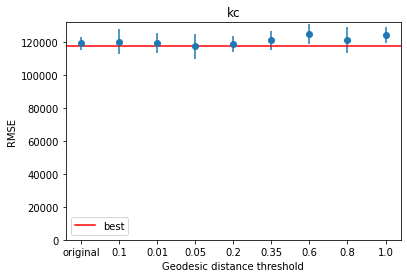

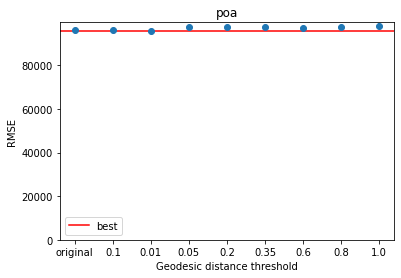

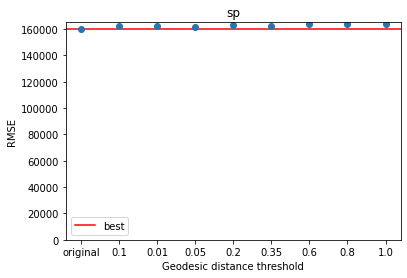

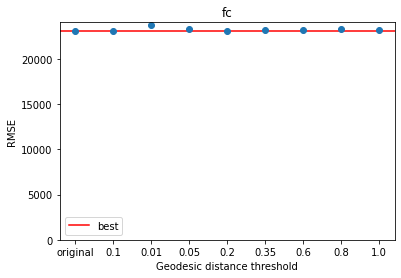

In [98]:
def plot(results, dataset):
    for metric in metrics:
        plt.figure()
        plt.title(dataset)
        plt.xlabel('Geodesic distance threshold')
        plt.ylabel("RMSE")

        plt.errorbar(list(results.keys()), [results[e][metric][0] for e in results.keys()], yerr=[results[e][metric][1] for e in results.keys()], fmt='o')

        # for exp in results.keys():
            # plt.bar(exp, results[exp][metric][0])
            # print(exp, results[exp][metric][0], results[exp][metric][1])

            # plt.errorbar(exp, results[exp][metric][0], yerr=results[exp][metric][1], fmt='o')
        # set horizontal line
        plt.axhline(y=np.min([results[e][metric][0] for e in results.keys()]), color='r', linestyle='-', label="best")

        plt.ylim(0)

        # set y to log scale
        # plt.yscale('log')

        plt.legend()
        plt.savefig('results_' + dataset + '_' + metric + '.png', dpi=300)
        plt.show()

for dataset in all_results.keys():
    plot(all_results[dataset], dataset)